In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
#data_00="/home/mustapha/Downloads/Predictive-Modeling-of-Ionic-Conductivity-in-Garnet-Type-Solid-Electrolytes-main/Data/data_65.csv"
file_path = "/home/mustapha/Downloads/data_augmented.xlsx"
file_path1 = "/home/mustapha/Downloads/Predictive-Modeling-of-Ionic-Conductivity-in-Garnet-Type-Solid-Electrolytes-main/Data/data_augmented.xlsx"



#df0 = pd.read_excel(file_path1)
df = pd.read_excel(file_path)
df1 = df.iloc[:176]
df2 = df.iloc[176:]

In [3]:
def calculate_average_ionic_radius(row):
    ionic_radii = {
        'Li': row['Li site dopant ionic radius'],
        'La': row['La site dopant ionic radius'],
        'Zr': row['Zr site dopant ionic radius']
    }
   
    stoichiometries = {
        'Li': row['Li stoichiometry'],
        'La': row['La stoichiometry'],
        'Zr': row['Zr stoichiometry']
    }
   
    total_radius = 0
    total_atoms = 0
   
    for element in ionic_radii:
        radius = ionic_radii[element]
        stoichiometry = stoichiometries[element]
       
        total_radius += radius * stoichiometry
        total_atoms += stoichiometry
   
    return total_radius / total_atoms

# Apply the function to each row in the DataFrame
df['average_ionic_radius'] = df.apply(calculate_average_ionic_radius, axis=1)

In [4]:
import pandas as pd
from sklearn.impute import KNNImputer

def knn_impute_relative_density(df, n_neighbors=5):
    # Check if 'log_cond' has any missing values
    if df['log_cond'].isna().all():
        # If 'log_cond' is entirely NaN, skip KNN and just ffill/bfill
        df['Relative density'] = df['Relative density'].ffill().bfill()
    else:
        # Select only the relevant columns for KNN imputation
        impute_df = df[['log_cond', 'Relative density']]

        # Initialize the KNNImputer
        imputer = KNNImputer(n_neighbors=n_neighbors)

        # Apply KNN Imputer
        imputed_values = imputer.fit_transform(impute_df)

        # Replace 'Relative density' column with imputed values
        df['Relative density'] = imputed_values[:, -1]  # Use the last column, which is 'Relative density'

        # Fill remaining missing values with forward fill and backward fill
        df['Relative density'] = df['Relative density'].ffill().bfill()

    return df

# Example usage
df = knn_impute_relative_density(df)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   source                            361 non-null    object 
 1   Publication year                  359 non-null    float64
 2   T of the conductivity C           349 non-null    float64
 3   Li stoichiometry                  362 non-null    float64
 4   La stoichiometry                  362 non-null    float64
 5   Zr stoichiometry                  362 non-null    float64
 6   Li site dopant stoichiometry      362 non-null    float64
 7   La site dopant stoichiometry      362 non-null    float64
 8   Zr site dopant stoichiometry      362 non-null    float64
 9   Relative density                  362 non-null    float64
 10  Ionic conductivity                359 non-null    float64
 11  log_cond                          359 non-null    float64
 12  Quality 

In [5]:
def transform_to_material_formula(row):
    # Extract the values from each column
    a = row['Li stoichiometry']
    b = row['La stoichiometry']
    c = row['Zr stoichiometry']
    x = row['Li site dopant stoichiometry']
    y = row['La site dopant stoichiometry']
    z = row['Zr site dopant stoichiometry']
    M = row['li_dopant']
    N = row['la_dopant']
    K = row['zr_dopant']



    formula = ''


    if a > 0:
        formula += f'Li{a:.2f}'

    # Add M if x > 0
    if x > 0:
        formula += f'{M}{x:.2f}'

    # Add La with its stoichiometry
    if b > 0:
        formula += f'La{b:.2f}'

    # Add N if y > 0
    if y > 0:
        formula += f'{N}{y:.2f}'

    # Add Zr with its stoichiometry
    if c > 0:
        formula += f'Zr{c:.2f}'

    # Add K if z > 0
    if z > 0:
        formula += f'{K}{z:.2f}'
        
    formula += f'O12'
   
    return formula



# Assuming you have a DataFrame named 'df' and want to create a new column 'MaterialFormula'
df['MaterialFormula'] = df.apply(transform_to_material_formula, axis=1)


In [6]:
import pandas as pd
from sklearn.impute import KNNImputer

def knn_impute_relative_density(df, n_neighbors=5):
    # Check if 'log_cond' has any missing values
    if df['log_cond'].isna().all():
        # If 'log_cond' is entirely NaN, skip KNN and just ffill/bfill
        df['Relative density'] = df['Relative density'].ffill().bfill()
    else:
        # Select only the relevant columns for KNN imputation
        impute_df = df[['log_cond', 'Relative density']]

        # Initialize the KNNImputer
        imputer = KNNImputer(n_neighbors=n_neighbors)

        # Apply KNN Imputer
        imputed_values = imputer.fit_transform(impute_df)

        # Replace 'Relative density' column with imputed values
        df['Relative density'] = imputed_values[:, -1]  # Use the last column, which is 'Relative density'

        # Fill remaining missing values with forward fill and backward fill
        df['Relative density'] = df['Relative density'].ffill().bfill()

    return df

# Example usage
df = knn_impute_relative_density(df)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   source                            361 non-null    object 
 1   Publication year                  359 non-null    float64
 2   T of the conductivity C           349 non-null    float64
 3   Li stoichiometry                  362 non-null    float64
 4   La stoichiometry                  362 non-null    float64
 5   Zr stoichiometry                  362 non-null    float64
 6   Li site dopant stoichiometry      362 non-null    float64
 7   La site dopant stoichiometry      362 non-null    float64
 8   Zr site dopant stoichiometry      362 non-null    float64
 9   Relative density                  362 non-null    float64
 10  Ionic conductivity                359 non-null    float64
 11  log_cond                          359 non-null    float64
 12  Quality 

## Tailored one-hot encoding strategy ##

In [7]:
def one_hot_encoding_li(df):
    u_l=pd.unique(df["li_dopant"]) # list containing the unique Li site dopants
    d={}
    for x in u_l:        
        if isinstance(x,str): # check if the type of this object is not 'Nan'
            d[x] = [] 
    for i in range(len(df["li_dopant"])):
        for k in d:
            if k == df["li_dopant"][i]:
                d[k].append(df["Li site dopant stoichiometry"][i])
                #if the site of col site is doped with that element
            else:
                d[k].append(0)
                # 0 if not
    return d

In [8]:
    def one_hot_encoding_la(df):
        u_l=pd.unique(df["la_dopant"]) 
        d={}
        for x in u_l:        
            if isinstance(x,str):
                d[x] = [] 
        for i in range(len(df["la_dopant"])):
            for k in d:
                if k == df["la_dopant"][i]:
                    d[k].append(df["La site dopant stoichiometry"][i])
                    # 1 if the site of col site is doped with that element
                else:
                    d[k].append(0)
                    # 0 if not
        return d

In [9]:
def one_hot_encoding_zr(df):
    u_l=pd.unique(df["zr_dopant"])
    d={}
    for x in u_l:        
        if isinstance(x,str): 
            d[x] = []
    for i in range(len(df["zr_dopant"])):
        for k in d:
            if k == df["zr_dopant"][i]:
                d[k].append(df["Zr site dopant stoichiometry"][i])
                # 1 if the site of col site is doped with that element
            else:
                d[k].append(0)
                # 0 if not
    return d

In [10]:
nouveau_dataset={}
li_dopant=pd.DataFrame(one_hot_encoding_li(df)) # replace li_dopant  with one_hot_encoding(li_dopant)
for key in li_dopant.columns:
    nouveau_dataset[key]=list(li_dopant[key]) 
#     nouveau_dataset["li_dopant_"+key]=list(li_dopant[key]) 
li_dopant[19:28]

,Ga,Al,Fe,Ge
19,0.15,0.0,0.0,0.0
20,0.10,0.0,0.0,0.0
21,0.00,0.0,0.0,0.0
22,0.00,0.0,0.0,0.0
23,0.00,0.0,0.0,0.0
24,0.00,0.0,0.0,0.0
25,0.00,0.0,0.0,0.0
26,0.00,0.0,0.0,0.0
27,0.00,0.0,0.0,0.0


In [11]:
la_dopant=pd.DataFrame(one_hot_encoding_la(df))
for key in la_dopant.columns:
    nouveau_dataset[key]=list(la_dopant[key])
#     nouveau_dataset["la_dopant_"+key]=list(la_dopant[key])
la_dopant[19:28]

,Sr,Ba,Ca,Ce,Rb,Y,Na,Yb,Al
19,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
zr_dopant=pd.DataFrame(one_hot_encoding_zr(df))
for key in zr_dopant.columns:
    nouveau_dataset[key]=list(zr_dopant[key])
#     nouveau_dataset["zr_dopant_"+key]=list(zr_dopant[key])
zr_dopant[19:28]

,Bi,Cr,Gd,Ge,Mo,Nb,Ru,Sb,Sm,Ta,W,Y,Eu,Te
19,0.0,0.0,0.0,0.0,0.0,0.200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,0.0,0.0,0.0,0.0,0.0,0.200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,0.0,0.0,0.0,0.0,0.0,0.625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.0,0.0,0.0,0.0,0.0,0.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,0.0,0.0,0.0,0.0,0.0,0.250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.0,0.0,0.0,0.0,0.0,0.200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,0.0,0.0,0.0,0.0,0.0,0.000,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0
27,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# addition of a new column to define which is the doped site
df.loc[df['Li site dopant stoichiometry'] != 0, 'li'] = 1 # 1 if the material is doped in the Li site
df.loc[df['Li site dopant stoichiometry'] == 0, 'li'] = 0 # 0 if not

df.loc[df['La site dopant stoichiometry'] != 0, 'la'] = 1 # 1 if the material is doped in the Li site
df.loc[df['La site dopant stoichiometry'] == 0, 'la'] = 0 # 0 if not

df.loc[df['Zr site dopant stoichiometry'] != 0, 'zr'] = 1 # 1 if the material is doped in the Li site
df.loc[df['Zr site dopant stoichiometry'] == 0, 'zr'] = 0 # 0 if not

df.head(-1)

,source,Publication year,T of the conductivity C,Li stoichiometry,La stoichiometry,Zr stoichiometry,Li site dopant stoichiometry,La site dopant stoichiometry,Zr site dopant stoichiometry,Relative density,...,Zr site dopant atomic number,Zr site dopant e_ionisation,Zr site dopant electron affinity,Zr site dopant atomic radius pm,Zr site dopant ionic radius,average_ionic_radius,MaterialFormula,li,la,zr
0,10.1063/1.5141764,2020.0,27.0,6.00,3.0,1.00,0.00,0.0,1.00,84.0000,...,83,7.2890,90.924,143,76.0,7.600000,Li6.00La3.00Zr1.00Bi1.00O12,0.0,0.0,1.0
1,10.1063/1.5141764,2020.0,27.0,6.25,3.0,1.25,0.00,0.0,0.75,83.0000,...,83,7.2890,90.924,143,76.0,9.047619,Li6.25La3.00Zr1.25Bi0.75O12,0.0,0.0,1.0
2,10.1063/1.5141764,2020.0,27.0,6.50,3.0,1.50,0.00,0.0,0.50,81.0000,...,83,7.2890,90.924,143,76.0,10.363636,Li6.50La3.00Zr1.50Bi0.50O12,0.0,0.0,1.0
3,10.1063/1.5141764,2020.0,27.0,6.75,3.0,1.75,0.00,0.0,0.25,80.0000,...,83,7.2890,90.924,143,76.0,11.565217,Li6.75La3.00Zr1.75Bi0.25O12,0.0,0.0,1.0
4,10.1016/j.ssi.2014.10.009,2014.0,27.0,7.10,3.0,1.90,0.00,0.0,0.10,95.2460,...,24,6.7400,65.210,166,61.5,9.737500,Li7.10La3.00Zr1.90Cr0.10O12,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,10.1016/j.jallcom.2021.161906,2021.0,25.0,6.80,2.8,1.80,0.00,0.2,0.20,93.9106,...,42,7.3500,72.100,190,59.0,40.263158,Li6.80La2.80Sr0.20Zr1.80Mo0.20O12,0.0,1.0,1.0
357,10.1016/j.electacta.2021.139249,2021.0,25.0,6.75,3.0,1.75,0.00,0.0,0.25,92.0660,...,41,6.7589,88.516,198,64.0,9.739130,Li6.75La3.00Zr1.75Nb0.25O12,0.0,0.0,1.0
358,10.1007/s10854-021-05353-3,2021.0,25.0,6.40,3.0,2.00,0.20,0.0,0.00,79.0000,...,0,0.0000,0.000,0,0.0,21.894737,Li6.40Al0.20La3.00Zr2.00O12,1.0,0.0,0.0
359,10.1007/s10854-021-05353-3,2021.0,25.0,6.25,3.0,2.00,0.25,0.0,0.00,94.0000,...,0,0.0000,0.000,0,0.0,21.666667,Li6.25Al0.25La3.00Zr2.00O12,1.0,0.0,0.0


In [14]:
new_dataset=pd.DataFrame(nouveau_dataset) # New dataset 

In [15]:
print("Shape of df:", df.shape)
print("Shape of nouveau_dataset:", new_dataset.shape)
    
# adding dopant elements to construct  DataFrame X    
X2= pd.concat([df, new_dataset], axis=1)

# X.info()
print("Shape of df:", X2.shape)

# Y.shape
X2.info()

Shape of df: (362, 49)
Shape of nouveau_dataset: (362, 24)
Shape of df: (362, 73)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 73 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   source                            361 non-null    object 
 1   Publication year                  359 non-null    float64
 2   T of the conductivity C           349 non-null    float64
 3   Li stoichiometry                  362 non-null    float64
 4   La stoichiometry                  362 non-null    float64
 5   Zr stoichiometry                  362 non-null    float64
 6   Li site dopant stoichiometry      362 non-null    float64
 7   La site dopant stoichiometry      362 non-null    float64
 8   Zr site dopant stoichiometry      362 non-null    float64
 9   Relative density                  362 non-null    float64
 10  Ionic conductivity                359 non-null    fl

In [16]:
materials_to_remove = ['Li6.40Al0.20La3.00Zr2.00O12', 'Li6.25Al0.25La3.00Zr2.00O12']
#df = df[~df['MaterialFormula'].isin(materials_to_remove)]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 49 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   source                            361 non-null    object 
 1   Publication year                  359 non-null    float64
 2   T of the conductivity C           349 non-null    float64
 3   Li stoichiometry                  362 non-null    float64
 4   La stoichiometry                  362 non-null    float64
 5   Zr stoichiometry                  362 non-null    float64
 6   Li site dopant stoichiometry      362 non-null    float64
 7   La site dopant stoichiometry      362 non-null    float64
 8   Zr site dopant stoichiometry      362 non-null    float64
 9   Relative density                  362 non-null    float64
 10  Ionic conductivity                359 non-null    float64
 11  log_cond                          359 non-null    float64
 12  Quality 

In [17]:
import numpy as np
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns

def check_monotonicity_with_deviation_removal(X, max_allowed_deviations, deviation_threshold):
    filtered_data = []
    non_increasing_materials = []

    grouped = df.groupby('MaterialFormula')

    for material, group in grouped:
        group_sorted = group.sort_values('Relative density')
        densities = group_sorted['Relative density'].values
        conductivities = group_sorted['log_cond'].values

        # Check for NaN or infinite values and remove them
        if np.any(np.isnan(conductivities)):
            print(f"Skipping material {material} due to NaN values.")
            continue

        if np.any(np.isinf(densities)) or np.any(np.isinf(conductivities)):
            print(f"Skipping material {material} due to infinite values.")
            continue

        # Handle materials with only one unique density value
        if len(np.unique(densities)) < 2:
            print(f"Including material {material} with a single unique 'Relative density' value.")
            filtered_data.append(group_sorted)
            continue

        # Fit a linear model to capture the average increasing trend
        slope, intercept, _, _, _ = linregress(densities, conductivities)

        # Check if the slope is positive
        if slope <= 0:
            non_increasing_materials.append(material)
            continue

        expected_trend = intercept + slope * densities
        deviations = conductivities - expected_trend
        significant_deviations = np.abs(deviations) > deviation_threshold

        # If the number of significant deviations is within the allowed limit, filter them out
        if significant_deviations.sum() <= max_allowed_deviations:
            group_filtered = group_sorted[~significant_deviations]
        else:
            # Otherwise, skip the entire material
            continue

        filtered_data.append(group_filtered)

    # Combine filtered data into a single DataFrame
    filtered_df = pd.concat(filtered_data)

    # Plot non-increasing materials
    sns.set(style="whitegrid")
    for material in non_increasing_materials:
        group = df[df['MaterialFormula'] == material]
        plt.figure(figsize=(6, 4))
        sns.lineplot(
            x='Relative density',
            y='log_cond',
            data=group,
            marker='o',
            label=material,
        )
        plt.title(f'Non-Increasing Trend for {material}')
        plt.xlabel('Relative density')
        plt.ylabel('log_cond')
        plt.legend()
        plt.show()

    # Remove non-increasing materials from the dataset
    filtered_df = filtered_df[~filtered_df['MaterialFormula'].isin(non_increasing_materials)]

    return filtered_df




In [18]:

X2 = check_monotonicity_with_deviation_removal(X, max_allowed_deviations=10, deviation_threshold=.2)

NameError: name 'X' is not defined

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_electric_neutrality(df, tolerance):
    # Ensure DataFrame has necessary columns
    required_columns = [
        'Li stoichiometry', 'La stoichiometry', 'Zr stoichiometry',
        'Li site dopant stoichiometry', 'Li site dopant ion charge',
        'La site dopant stoichiometry', 'La site dopant ion charge',
        'Zr site dopant stoichiometry', 'Zr site dopant ion charge'
    ]
    
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Column '{col}' is missing from the DataFrame")

    # Calculate the total charge for each row
    df['Total Charge'] = (
        df['Li stoichiometry'] * 1 +  # Li has a charge of +1
        df['La stoichiometry'] * 3 +  # La has a charge of +3
        df['Zr stoichiometry'] * 4 +  # Zr has a charge of +4
        df['Li site dopant stoichiometry'] * df['Li site dopant ion charge'] +  # Li site dopant charge
        df['La site dopant stoichiometry'] * df['La site dopant ion charge'] +  # La site dopant charge
        df['Zr site dopant stoichiometry'] * df['Zr site dopant ion charge']  # Zr site dopant charge
    )
    
    # Subtract 24 from the total charge to check neutrality
    df['Charge Difference'] = df['Total Charge'] - 24

    # Identify rows that do not satisfy neutrality within the specified tolerance
    non_neutrality_indexes = df[df['Charge Difference'].abs() > tolerance].index

    df_filtered = df.drop(non_neutrality_indexes)

    # Plotting the charge difference
    plt.figure(figsize=(10, 6))
    plt.scatter(df.index, df['Charge Difference'], alpha=0.7, edgecolors='w', s=100)
    plt.axhline(y=0, color='r', linestyle='--', label='Neutrality Line (Charge = 24)')
    plt.axhline(y=tolerance, color='g', linestyle='--', label=f'Neutrality Tolerance ±{tolerance}')
    plt.axhline(y=-tolerance, color='g', linestyle='--')
    plt.xlabel('Index')
    plt.ylabel('Charge Difference (Total Charge - 24)')
    plt.title('Electric Neutrality of the Material')
    plt.legend()
    plt.grid(True)
    plt.show()

    return df_filtered, non_neutrality_indexes

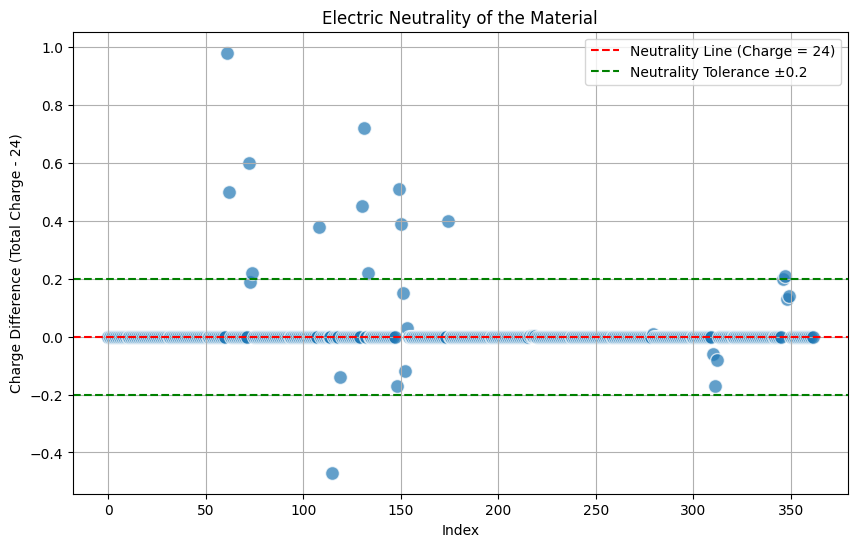

<class 'pandas.core.frame.DataFrame'>
Index: 349 entries, 0 to 361
Data columns (total 75 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   source                            348 non-null    object 
 1   Publication year                  347 non-null    float64
 2   T of the conductivity C           337 non-null    float64
 3   Li stoichiometry                  349 non-null    float64
 4   La stoichiometry                  349 non-null    float64
 5   Zr stoichiometry                  349 non-null    float64
 6   Li site dopant stoichiometry      349 non-null    float64
 7   La site dopant stoichiometry      349 non-null    float64
 8   Zr site dopant stoichiometry      349 non-null    float64
 9   Relative density                  349 non-null    float64
 10  Ionic conductivity                347 non-null    float64
 11  log_cond                          347 non-null    float64
 12  Quality of io

In [20]:
X2, non_neutrality_indexes = plot_electric_neutrality(X2, 0.2)

# Inspect the filtered DataFrame and the indices of non-neutral rows
X2.info()

In [21]:
X=X2
X = X.drop(['Ionic conductivity'],axis=1)
X = X.drop(['Publication year','Quality of ionic conductivity','source','Doping strategy'], axis=1)
X = X.drop(['MaterialFormula'],axis=1)
X = X.drop(['li_dopant','la_dopant','zr_dopant'], axis=1)


In [22]:
# Missing values

##########################
# # Sort the DataFrame by the "c" column
# X_sorted = X.sort_values(by='log_cond')

# # # Perform linear interpolation on the "rd" column
# X_filled = X_sorted.interpolate(method='linear', limit_direction='both', inplace=False)
# c=X_filled['log_cond']

# X_filled=X_filled.drop('log_cond', axis=1)

# Y = c
# X_filled.info()


#########################

# X= X[X['Relative density'] >= 80]
# X= X[X['Ionic conductivity'] <= 1.2e-03]
    
# rd_mean = X['Relative density'].mean()
# X = X.fillna({'Relative density': rd_mean})
# Y = X['log_cond']
# X = X.drop(['log_cond'],axis=1)

# X = X.dropna()
# c = X['log_cond']
# X = X.drop(['log_cond'],axis=1)
# Y = c

#########################

from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)
# Fit and transform the data to impute the missing values
X_knn = knn_imputer.fit_transform(X)

# Convert the imputed NumPy array back to a DataFrame and specify column names
X_knn = pd.DataFrame(data=X_knn, columns=X.columns)

# Assuming you already have 'Ionic conductivity' in the DataFrame
Y = X_knn['log_cond']

# Drop the 'Ionic conductivity' column from X
X_knn = X_knn.drop('log_cond', axis=1)

In [25]:
X_knn.columns

Index(['T of the conductivity C', 'Li stoichiometry', 'La stoichiometry',
       'Zr stoichiometry', 'Li site dopant stoichiometry',
       'La site dopant stoichiometry', 'Zr site dopant stoichiometry',
       'Relative density', 'Li site dopant crystal rad.',
       'Li site dopant ion charge', 'Li site dopant electroneg.',
       'Li site dopant molar mass', 'Li site dopant atomic number',
       'Li site dopant e_ionisation', 'Li site dopant electron affinity',
       'Li site dopant atomic radius', 'Li site dopant ionic radius',
       'La site dopant crystal rad.', 'La site dopant ion charge',
       'La site dopant electroneg.', 'La site dopant molar mass',
       'La site dopant atomic number', 'La site dopant e_ionisation',
       'La site dopant electron affinity', 'La site dopant atomic radius',
       'La site dopant ionic radius', 'Zr site dopant crystal rad.',
       'Zr site dopant ion charge', 'Zr site dopant electroneg.',
       'Zr site dopant molar mass', 'Zr site do

In [24]:
import itertools
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score
import pandas as pd

# Define the groups
GROUP1 = [
    'li', 'la', 'zr', 'Ga', 'Al', 'Fe', 'Ge', 'Sr',
    'Ba', 'Ca', 'Ce', 'Rb', 'Y', 'Na', 'Yb', 'Bi', 'Cr', 'Gd', 'Mo', 'Nb',
    'Ru', 'Sb', 'Sm', 'Ta', 'W', 'Eu', 'Te', 'Relative density', 'average_ionic_radius'
]

GROUP2 = [
    ['Li site dopant ionic radius', 'La site dopant ionic radius', 'Zr site dopant ionic radius'],
    ['Li site dopant atomic radius', 'La site dopant atomic radius', 'Zr site dopant atomic radius pm'],
    ['Li site dopant electron affinity', 'La site dopant electron affinity', 'Zr site dopant electron affinity'],
    ['Li site dopant e_ionisation', 'La site dopant e_ionisation', 'Zr site dopant e_ionisation'],
    ['Li site dopant atomic number', 'La site dopant atomic number', 'Zr site dopant atomic number'],
    ['Li site dopant molar mass', 'La site dopant molar mass', 'Zr site dopant molar mass'],
    ['Li site dopant electroneg.', 'La site dopant electroneg.', 'Zr site dopant electroneg.'],
    ['Li site dopant ion charge', 'La site dopant ion charge', 'Zr site dopant ion charge'],
    ['Li site dopant crystal rad.', 'La site dopant crystal rad.', 'Zr site dopant crystal rad.']
]

GROUP3 = [
    ['Li stoichiometry', 'La stoichiometry', 'Zr stoichiometry'],
    ['Li site dopant stoichiometry', 'La site dopant stoichiometry', 'Zr site dopant stoichiometry']
]

# Initialize a list to store the results
results = []

# Iterate over all combinations of one or more lines from GROUP2
for r2 in range(1, len(GROUP2) + 1):
    for group2_combination in itertools.combinations(GROUP2, r=r2):
        
        # Iterate over all combinations of one or more lines from GROUP3
        for r3 in range(1, len(GROUP3) + 1):
            for group3_combination in itertools.combinations(GROUP3, r=r3):
                
                # Start with the original feature set (all GROUP1 features are included)
                X_temp = X.copy()

                # Drop the selected features from GROUP2
                for cols_to_drop in group2_combination:
                    X_temp = X_temp.drop(cols_to_drop, axis=1)
                
                # Drop the selected features from GROUP3
                for cols_to_drop in group3_combination:
                    X_temp = X_temp.drop(cols_to_drop, axis=1)
                
                # Split the data
                X_train, X_test, Y_train, Y_test = train_test_split(X_temp, Y, test_size=0.25, random_state=42)
                
                # Train the model using CatBoostRegressor
                model = CatBoostRegressor(verbose=0, random_state=42)
                model.fit(X_train, Y_train)
                Y_test_pred = model.predict(X_test)
                
                # Evaluate the model
                r2 = r2_score(Y_test, Y_test_pred)
                
                # Store the result
                results.append({
                    'GROUP2_combination': [cols for sublist in group2_combination for cols in sublist],
                    'GROUP3_combination': [cols for sublist in group3_combination for cols in sublist],
                    'R-squared (R2)': r2
                })

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Display the results sorted by R2 score
results_df = results_df.sort_values(by='R-squared (R2)', ascending=False)
results_df
#0.484718

,GROUP1_combination,GROUP2_combination,R-squared (R2)
494,"[Li stoichiometry, La stoichiometry, Zr stoich...","[Li site dopant atomic radius, La site dopant ...",0.484718
500,"[Li stoichiometry, La stoichiometry, Zr stoich...","[Li site dopant electron affinity, La site dop...",0.477010
2,"[Li stoichiometry, La stoichiometry, Zr stoich...","[Li site dopant electron affinity, La site dop...",0.469980
65,"[Li stoichiometry, La stoichiometry, Zr stoich...","[Li site dopant ionic radius, La site dopant i...",0.468680
68,"[Li stoichiometry, La stoichiometry, Zr stoich...","[Li site dopant ionic radius, La site dopant i...",0.468680
...,...,...,...
865,"[Li site dopant stoichiometry, La site dopant ...","[Li site dopant atomic radius, La site dopant ...",0.356056
963,"[Li site dopant stoichiometry, La site dopant ...","[Li site dopant atomic radius, La site dopant ...",0.347580
1018,"[Li site dopant stoichiometry, La site dopant ...","[Li site dopant ionic radius, La site dopant i...",0.346780
989,"[Li site dopant stoichiometry, La site dopant ...","[Li site dopant ionic radius, La site dopant i...",0.340368


In [ ]:
results_df['GROUP1_combination'][:5]

In [ ]:
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import pandas as pd

# Define a list of regression models to test
models = [
    HistGradientBoostingRegressor(),
    LinearRegression(),
    Ridge(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    XGBRegressor(),
    LGBMRegressor(),
    CatBoostRegressor()
]

# Define the different test split sizes
test_splits = [0.20, 0.25, 0.30]

# Preprocessing steps
# Define numerical and categorical features
numeric_features = X_knn.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_knn.select_dtypes(include=['object', 'category']).columns

# Preprocessing for numerical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing for numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Initialize an empty list to store the results
results = []

# Iterate over the models and evaluate each one for different test split sizes
for model in models:
    for test_size in test_splits:
        # Splitting the data into training and testing sets
        X_train, X_test, Y_train, Y_test = train_test_split(X_knn, Y, test_size=test_size, random_state=42)

        # Create a pipeline that includes preprocessing and the model
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', model)])

        # Fit the model and make predictions
        pipeline.fit(X_train, Y_train)
        Y_test_pred = pipeline.predict(X_test)

        # Calculate metrics
        mse = mean_squared_error(Y_test, Y_test_pred)
        r2 = r2_score(Y_test, Y_test_pred)

        # Record the results
        results.append({
            "Model": type(model).__name__,
            "Test Split Size": test_size,
            "R-squared (R2)": r2,
            "Mean Squared Error (MSE)": mse
        })

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)




In [ ]:
results_df.sort_values(by='R-squared (R2)', ascending=False, inplace=True)


# Resetting the indexes to start from 1
results_df.reset_index(drop=True, inplace=True)
results_df

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Define a list of regression models to test
models = [
    HistGradientBoostingRegressor(),
    LinearRegression(),
    Ridge(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    XGBRegressor(),
    LGBMRegressor(),
    CatBoostRegressor()
]

# Define a list of test split sizes
test_splits = [0.20, 0.25, 0.30]

# Initialize an empty list to store the results
results = []

# Number of iterations
num_iterations = 1

# Iterate over each model
for model in models:
    model_name = type(model).__name__
    
    # Iterate over each test split size
    for test_size in test_splits:
        avg_mse = 0
        avg_r2 = 0
        
        # Run the model multiple times for each test split size
        for _ in range(num_iterations):
            # Split the data into training and testing sets
            X_train, X_test, Y_train, Y_test = train_test_split(X_knn, Y, test_size=test_size, random_state=42, shuffle=True)
            
            # Fit the model and make predictions
            model.fit(X_train, Y_train)
            Y_train_pred = model.predict(X_train)
            Y_test_pred = model.predict(X_test)
            
            # Calculate metrics for this iteration
            mse = mean_squared_error(Y_test, Y_test_pred)
            r2 = r2_score(Y_test, Y_test_pred)
            
            # Update the average metrics
            avg_mse += mse
            avg_r2 += r2
        
        # Calculate the average metrics over the iterations
        avg_mse /= num_iterations
        avg_r2 /= num_iterations
        
        # Append the results to the list
        results.append({
            "Model": model_name, 
            "Test Split Size": test_size, 
            "R-squared (R2)": avg_r2, 
            "Mean Squared Error (MSE)": avg_mse
        })

# Convert the results list to a DataFrame
results_df1 = pd.DataFrame(results)


In [ ]:
results_df1.sort_values(by='R-squared (R2)', ascending=False, inplace=True)


# Resetting the indexes to start from 1
results_df1.reset_index(drop=True, inplace=True)
results_df1

In [ ]:
import optuna
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

# Define test splits to iterate over
test_splits = [0.3,0.25,0.2]

# Initialize a dictionary to store results
results = {}

# Loop over each test split
for test_split in test_splits:
    print(f"\nRunning for test split: {int(test_split * 100)}%")
    
    # Split the data for the current test split
    X_train, X_test, Y_train, Y_test = train_test_split(X_knn, Y, test_size=test_split, random_state=42)
    
    def objective(trial):
        # Define the hyperparameters to tune


        params = {
            'iterations': trial.suggest_int('iterations', 700, 1200),
            'depth': trial.suggest_int('depth', 5, 13),
            'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.02),
            'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e-3),
            'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),
            'border_count': trial.suggest_int('border_count', 32, 300)
        }

        # Train the model with the given parameters
        cat_model = CatBoostRegressor(**params, random_state=42, verbose=0)
        cat_model.fit(X_train, Y_train)
        
        # Predict on the validation set
        y_pred = cat_model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(Y_test, y_pred)
        
        # Since Optuna minimizes the objective, we need to return the negative R2 score
        return -r2

    # Create a study object and optimize the objective function
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=50)

    # Store the best parameters and the best R2 score for this split
    best_params = study.best_params
    best_r2 = -study.best_value
    
    # Train the final model with the best parameters
    final_model = CatBoostRegressor(**best_params, random_state=42, verbose=0)
    final_model.fit(X_train, Y_train)

    # Predict and evaluate the final model
    final_pred = final_model.predict(X_test)
    final_mse = mean_squared_error(Y_test, final_pred)
    final_r2 = r2_score(Y_test, final_pred)
    
    # Store results in the dictionary
    results[int(test_split * 100)] = {
        'Best Parameters': best_params,
        'Best R2 Score': best_r2,
        'Final MSE': final_mse,
        'Final R2 Score': final_r2
    }

# Print all results after training on all splits
print("\nAll Results:")
for split, result in results.items():
    print(f"\nTest Split: {split}%")
    print(f"Best Parameters: {result['Best Parameters']}")

    print(f"Final R2 Score: {result['Final R2 Score']}")


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_knn, Y, test_size=0.2, random_state=42, shuffle=True)


# model1=CatBoostRegressor(bagging_temperature = 0.5, depth = 3, iterations = 214, l2_leaf_reg = 7,
#                          learning_rate = 0.3, random_strength = 0.5)
model1 = CatBoostRegressor()
model1.fit(X_train, Y_train)
Y_train_pred = model1.predict(X_train)
Y_test_pred = model1.predict(X_test)

# Calculate metrics for this iteration
mse = mean_squared_error(Y_test, Y_test_pred)
r2_cat = r2_score(Y_test, Y_test_pred)
print('R2 score for the CatBoostRegressor Model is: ', r2_cat)

In [ ]:
# !pip install shap


In [ ]:
import shap
import matplotlib.pyplot as plt
import numpy as np

catboost_fit = CatBoostRegressor()
catboost_fit.fit(X_train, Y_train)

explainer = shap.Explainer(catboost_fit)
shap_values = explainer.shap_values(X_train)


mean_shap_values = np.abs(shap_values).mean(axis=0)

# Sorting features based on mean SHAP values
sorted_idx = np.argsort(mean_shap_values)

plt.figure(figsize=(12, 6))
plt.barh(np.arange(X_train.shape[1]) + 1, mean_shap_values[sorted_idx], align='center')
plt.yticks(np.arange(X_train.shape[1]) + 1, X_train.columns[sorted_idx])
plt.xlabel('Average Absolute SHAP Value')
plt.title('CatBoost Feature Importance (SHAP Values)')

# Display the values on the plot 
for index, value in enumerate(mean_shap_values[sorted_idx]):
    plt.text(value, index + 1, f'{value:.4f}')

plt.show()


In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(Y_train, Y_train_pred, color='blue', alpha=0.5, label='Train Predictions (CatBoostRegressor)')
# Plot for the test set (blue)
plt.scatter(Y_test, Y_test_pred, color='red', alpha=0.5, label='Test Predictions (CatBoostRegressor)')

plt.plot( [-8,-2.5], [-8,-2.5], 'k--', lw=2)
plt.title('Actual vs. Predicted Values for CatBoostRegressor')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()



## GradientBoostingRegressor ##

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_knn, Y, test_size=0.25, random_state=42, shuffle=True)

model2 = GradientBoostingRegressor()
model2.fit(X_train, Y_train)
Y_train_pred = model2.predict(X_train)
Y_test_pred = model2.predict(X_test)

# Calculate metrics for this iteration
mse = mean_squared_error(Y_test, Y_test_pred)
r2_g = r2_score(Y_test, Y_test_pred)
print('R2 score for the GradientBoostingRegressor Model is: ', r2_g)

In [ ]:
plt.figure(figsize=(8, 8))


plt.scatter(Y_train, Y_train_pred, color='blue', alpha=0.5, label='Train Predictions (GradientBoostingRegressor)')

# Plot for the test set (blue)
plt.scatter(Y_test, Y_test_pred, color='red', alpha=0.5, label='Test Predictions (GradientBoostingRegressor)')

plt.plot( [-8,-2.5], [-8,-2.5], 'k--', lw=2)
plt.title('Actual vs. Predicted Values for GradientBoostingRegressor')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()
